In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import re
import seaborn as sns
import tensorflow
from joblib import dump
from splitfolders import split
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50, VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Menentukan apakah GPU tersedia atau tidak
gpus = tensorflow.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Failed to detect a GPU.


In [3]:
# Path folder train dermnet
dermnet_folder = "D:\\kuliah\\Python\\dataset\\dermnet\\train"

# Path folder train skin dataset
skin_dataset_train_folder = "D:\\kuliah\\Python\\dataset\\skindataset\\skin\\train"

# Path folder test skin dataset
skin_dataset_test_folder = "D:\\kuliah\\Python\\dataset\\skindataset\\skin\\test"

# Tentukan path untuk folder output
output_folder = "D:\\kuliah\\Python\\dataset\\skindataset\\skin\\train_split"

In [4]:
# List nama folder yang ingin disalin
data_test_copy = ['Melanoma Skin Cancer Nevi and Moles']

# List nama file yang ingin disalin
data_train_copy = ['Melanoma Skin Cancer Nevi and Moles']

In [5]:
# Salin hanya folder yang ada dalam list `data_test_copy` pada folder TEST
for folder_name in data_test_copy:
    src_folder = os.path.join(dermnet_folder, folder_name)
    dst_folder = os.path.join(skin_dataset_test_folder, folder_name)
    
    # Periksa apakah folder tujuan sudah ada
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    
    # Salin semua file dari folder sumber ke folder tujuan
    for file_name in os.listdir(src_folder):
        src_file = os.path.join(src_folder, file_name)
        dst_file = os.path.join(dst_folder, file_name)
        if os.path.exists(dst_file):
            print(f"File {dst_file} already exists, skipping...")
        else:
            shutil.copy(src_file, dst_file)
            print(f"File {src_file} copied to {dst_file}")

File D:\kuliah\Python\dataset\skindataset\skin\test\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-11.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\test\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-13.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\test\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-14.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\test\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-15.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\test\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-16.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\test\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-17.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\test\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-20.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset

In [6]:
# Salin hanya folder yang ada dalam list `data_train_copy` pada folder TRAIN
for folder_name in data_train_copy:
    src_folder = os.path.join(dermnet_folder, folder_name)
    dst_folder = os.path.join(skin_dataset_train_folder, folder_name)
    
    # Periksa apakah folder tujuan sudah ada
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    
    # Salin semua file dari folder sumber ke folder tujuan
    for file_name in os.listdir(src_folder):
        src_file = os.path.join(src_folder, file_name)
        dst_file = os.path.join(dst_folder, file_name)
        if os.path.exists(dst_file):
            print(f"File {dst_file} already exists, skipping...")
        else:
            shutil.copy(src_file, dst_file)
            print(f"File {src_file} copied to {dst_file}")

File D:\kuliah\Python\dataset\skindataset\skin\train\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-11.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\train\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-13.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\train\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-14.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\train\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-15.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\train\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-16.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\train\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-17.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skindataset\skin\train\Melanoma Skin Cancer Nevi and Moles\atypical-nevi-20.jpg already exists, skipping...
File D:\kuliah\Python\dataset\skin

In [7]:
folder_train_to_delete = os.path.join(skin_dataset_train_folder, 'Psoriasis pictures Lichen Planus and related diseases')
folder_test_to_delete = os.path.join(skin_dataset_test_folder, 'Psoriasis pictures Lichen Planus and related diseases')

try:
    # Hapus seluruh isi dari folder yang ingin dihapus
    shutil.rmtree(folder_train_to_delete)
    shutil.rmtree(folder_test_to_delete)
    
    print(f"Folder '{folder_train_to_delete}' berhasil dihapus.")
    print(f"Folder '{folder_test_to_delete}' berhasil dihapus.")
    
except Exception as e:
    print(f"Gagal menghapus train folder '{folder_train_to_delete}': {e}")
    print(f"Gagal menghapus test folder '{folder_test_to_delete}': {e}")

Gagal menghapus train folder 'D:\kuliah\Python\dataset\skindataset\skin\train\Psoriasis pictures Lichen Planus and related diseases': [WinError 3] The system cannot find the path specified: 'D:\\kuliah\\Python\\dataset\\skindataset\\skin\\train\\Psoriasis pictures Lichen Planus and related diseases'
Gagal menghapus test folder 'D:\kuliah\Python\dataset\skindataset\skin\test\Psoriasis pictures Lichen Planus and related diseases': [WinError 3] The system cannot find the path specified: 'D:\\kuliah\\Python\\dataset\\skindataset\\skin\\train\\Psoriasis pictures Lichen Planus and related diseases'


In [8]:
folder_train_to_delete = os.path.join(skin_dataset_train_folder, 'Psoriasis pictures Lichen Planus and related diseases')
folder_test_to_delete = os.path.join(skin_dataset_test_folder, 'Psoriasis pictures Lichen Planus and related diseases')

try:
    # Hapus seluruh isi dari folder yang ingin dihapus
    shutil.rmtree(folder_train_to_delete)
    shutil.rmtree(folder_test_to_delete)
    
    print(f"Folder '{folder_train_to_delete}' berhasil dihapus.")
    print(f"Folder '{folder_test_to_delete}' berhasil dihapus.")
    
except Exception as e:
    print(f"Gagal menghapus train folder '{folder_train_to_delete}': {e}")
    print(f"Gagal menghapus test folder '{folder_test_to_delete}': {e}")

Gagal menghapus train folder 'D:\kuliah\Python\dataset\skindataset\skin\train\Psoriasis pictures Lichen Planus and related diseases': [WinError 3] The system cannot find the path specified: 'D:\\kuliah\\Python\\dataset\\skindataset\\skin\\train\\Psoriasis pictures Lichen Planus and related diseases'
Gagal menghapus test folder 'D:\kuliah\Python\dataset\skindataset\skin\test\Psoriasis pictures Lichen Planus and related diseases': [WinError 3] The system cannot find the path specified: 'D:\\kuliah\\Python\\dataset\\skindataset\\skin\\train\\Psoriasis pictures Lichen Planus and related diseases'


In [9]:
# Bagi data menjadi train (70%), validation (30%)
split.ratio(skin_dataset_train_folder, output=output_folder, seed=42, ratio=(0.7, 0.3), group_prefix=None)

Copying files: 7331 files [00:06, 1102.07 files/s]


In [10]:
# Path untuk data latih, validasi, dan test yang telah terbagi
train_folder = os.path.join(output_folder, 'train')
val_folder = os.path.join(output_folder, 'val')
skin_dataset_test_folder = skin_dataset_test_folder

train_data = []
val_data = []
test_data = []

In [11]:
# Loop through each folder (class) in the training data directory
for folder in os.listdir(train_folder):
    folder_path = os.path.join(train_folder, folder)
    files_train = os.listdir(folder_path)
    for file in files_train:
        try:
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            
            # Check if image is loaded successfully
            if img is None:
                continue

             # Convert image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Penghilangan noise menggunakan filter Gaussian pada gambar grayscale
            denoised_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

            # Normalisasi intensitas pada gambar grayscale
            normalized_img = cv2.equalizeHist(gray_img)
    
            # Deteksi tepi menggunakan Canny edge detection pada gambar grayscale
            edges_img = cv2.Canny(gray_img, 30, 150)
            
            img = cv2.resize(img, (224, 224))
            train_data.append((img, folder))
        except Exception as e:
            # Handle exception
            print("Error:", str(e))

In [12]:
# Loop through each folder (class) in the validation data directory
for folder in os.listdir(val_folder):
    folder_path = os.path.join(val_folder, folder)
    files_val = os.listdir(folder_path)
    for file in files_val:
        try:
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            
            # Check if image is loaded successfully
            if img is None:
                continue

             # Convert image to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Penghilangan noise menggunakan filter Gaussian pada gambar grayscale
            denoised_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

            # Normalisasi intensitas pada gambar grayscale
            normalized_img = cv2.equalizeHist(gray_img)
    
            # Deteksi tepi menggunakan Canny edge detection pada gambar grayscale
            edges_img = cv2.Canny(gray_img, 30, 150)
            
            img = cv2.resize(img, (224, 224))
            val_data.append((img, folder))
        except Exception as e:
            # Handle exception
            print("Error:", str(e))

In [13]:
# Loop through each folder (class) in the test data directory
for folder in os.listdir(skin_dataset_test_folder):
    folder_path = os.path.join(skin_dataset_test_folder, folder)
    files_test = os.listdir(folder_path)
    for file in files_test:
        try:
            file_path = os.path.join(folder_path, file)
            img = cv2.imread(file_path)
            
            # Check if image is loaded successfully
            if img is None:
                continue
        
            img = cv2.resize(img, (224, 224))
            test_data.append((img, folder))
        except Exception as e:
            # Handle exception
            print("Error:", str(e))

In [14]:
# Definisikan jumlah class
num_classes = len(os.listdir(train_folder))

In [15]:
# Pra-pemrosesan data latih, validasi, dan test
train_images, train_labels = zip(*train_data)
val_images, val_labels = zip(*val_data)
test_images, test_labels = zip(*test_data)

train_images = preprocess_input(np.array(train_images))
val_images = preprocess_input(np.array(val_images))
test_images = preprocess_input(np.array(test_images))

In [16]:
# Ubah label menjadi one-hot encoding
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
val_labels_encoded = le.transform(val_labels)
test_labels_encoded = le.transform(test_labels)

train_labels_one_hot = to_categorical(train_labels_encoded, num_classes)
val_labels_one_hot = to_categorical(val_labels_encoded, num_classes)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes)

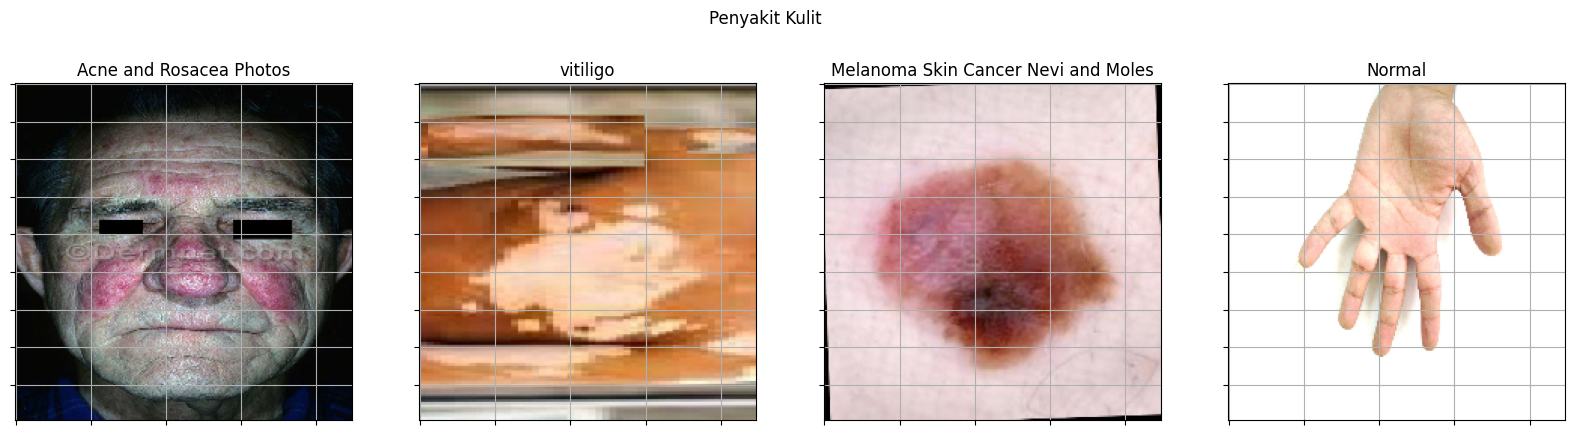

In [17]:
# Tampilkan contoh gambar dengan label
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.suptitle('Penyakit Kulit')

for (img, label), ax in zip(random.sample(train_data, 4), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

In [18]:
# Muat model ResNet50 yang telah terlatih
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [19]:
# Tampilkan ringkasan model
base_model_resnet50.summary()

# Bekukan lapisan model dasar ResNet50
base_model_resnet50.trainable = True

# Cari indeks lapisan yang ingin kita latih ulang
fine_tune_at = 150

# Bekukan semua lapisan sebelum lapisan yang ingin dilatih ulang
for layer in base_model_resnet50.layers[:fine_tune_at]:
    layer.trainable = False

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [20]:
# Menambahkan lapisan global average pooling di atas model dasar
x_resnet50 = GlobalAveragePooling2D()(base_model_resnet50.output)

# Menambahkan lapisan dense dengan 512 neuron dan fungsi aktivasi ReLU
x_resnet50 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x_resnet50)

# Menambahkan lapisan dropout dengan dropout rate 0.5
x_resnet50 = Dropout(0.5)(x_resnet50)

# Menambahkan lapisan dense dengan 256 neuron dan fungsi aktivasi ReLU
x_resnet50 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x_resnet50)

# Fungsi aktivasi softmax
predictions_resnet50 = Dense(num_classes, activation='softmax')(x_resnet50)

# Menggabungkan model dasar ResNet50 dengan kepala yang baru
model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions_resnet50)

# Compile model ResNet50
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Latih model ResNet50 dengan data training dan validation
custom_early_stopping_resnet50 = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='min'
)

In [22]:
# Pelatihan model ResNet50
history_resnet50 = model_resnet50.fit(train_images, train_labels_one_hot, validation_data=(val_images, val_labels_one_hot),
                                      epochs=25, batch_size=32, callbacks=[custom_early_stopping_resnet50])

Epoch 1/25
161/161 [==============================] - 385s 2s/step - loss: 5.0487 - accuracy: 0.7461 - val_loss: 1.8560 - val_accuracy: 0.8077
Epoch 2/25
161/161 [==============================] - 414s 3s/step - loss: 1.2253 - accuracy: 0.8312 - val_loss: 3.1734 - val_accuracy: 0.7836
Epoch 3/25
161/161 [==============================] - 430s 3s/step - loss: 0.7193 - accuracy: 0.8735 - val_loss: 0.6855 - val_accuracy: 0.8395
Epoch 4/25
161/161 [==============================] - 437s 3s/step - loss: 0.5182 - accuracy: 0.8993 - val_loss: 0.5747 - val_accuracy: 0.8705
Epoch 5/25
161/161 [==============================] - 441s 3s/step - loss: 0.3894 - accuracy: 0.9245 - val_loss: 0.5478 - val_accuracy: 0.8750
Epoch 6/25
161/161 [==============================] - 449s 3s/step - loss: 0.3213 - accuracy: 0.9409 - val_loss: 0.5832 - val_accuracy: 0.8573
Epoch 7/25
161/161 [==============================] - 444s 3s/step - loss: 0.2988 - accuracy: 0.9526 - val_loss: 0.5220 - val_accuracy: 0.8741

In [23]:
# Simpan Model ResNet50
model_resnet50.save("D:\\kuliah\\Python\\dataset\\archive\\resnet50.h5")

In [24]:
# Evaluasi model ResNet50 dengan data test
test_loss_resnet50, test_acc_resnet50 = model_resnet50.evaluate(test_images, test_labels_one_hot)
print(f'Test Loss ResNet50: {test_loss_resnet50}')
print(f'Test Accuracy ResNet50: {test_acc_resnet50}')

56/56 [==============================] - 81s 1s/step - loss: 0.5736 - accuracy: 0.8825
Test Loss ResNet50: 0.5735592842102051
Test Accuracy ResNet50: 0.8824531435966492


56/56 [==============================] - 85s 1s/step


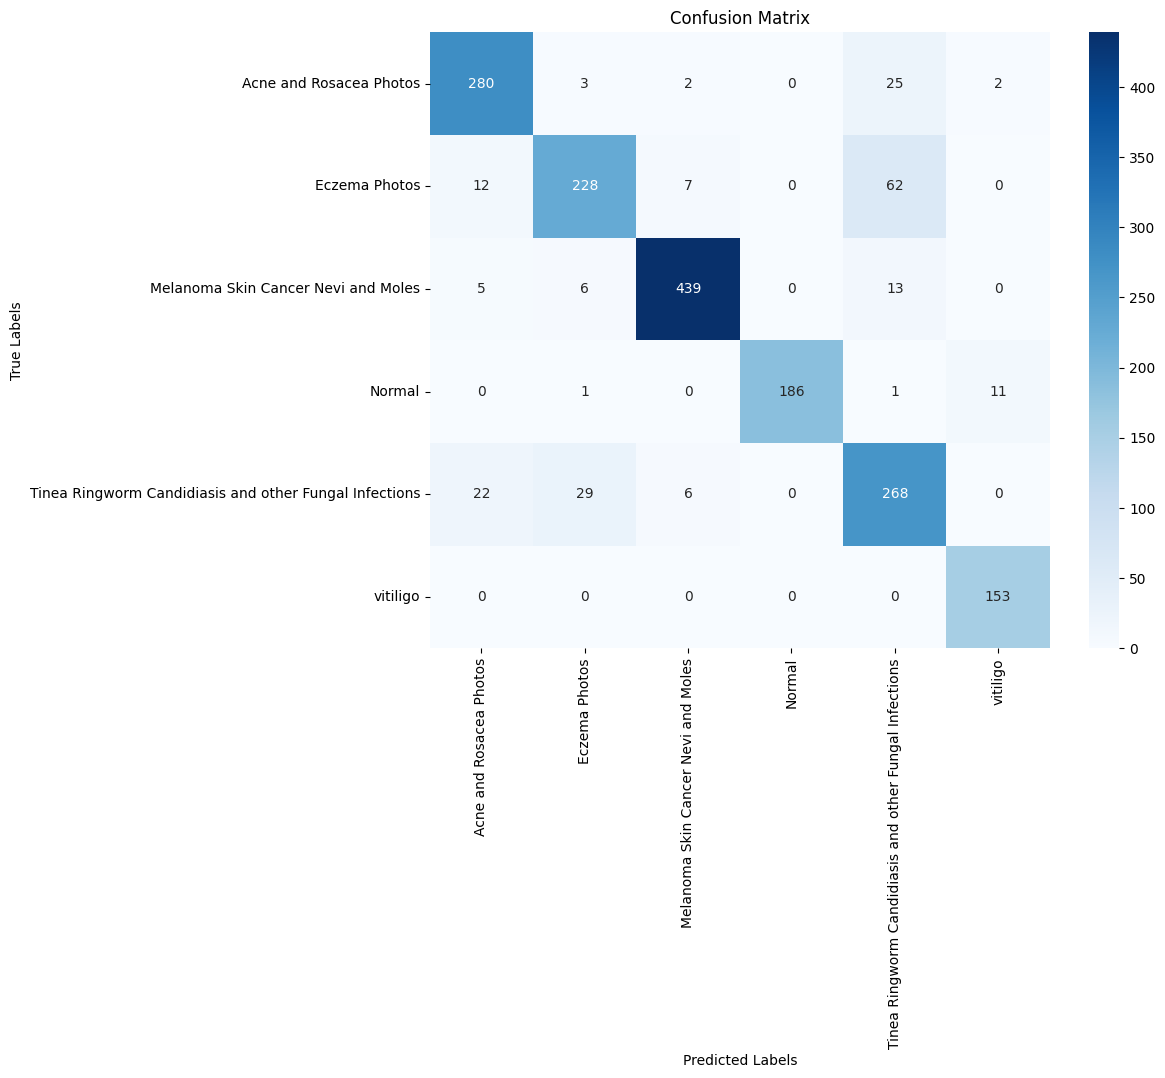

In [25]:
# Lakukan prediksi pada data uji
test_predictions = model_resnet50.predict(test_images)

# Konversi prediksi dari one-hot encoding ke label kelas
test_pred_labels = np.argmax(test_predictions, axis=1)

# Konversi label sebenarnya dari one-hot encoding ke label kelas
test_true_labels = np.argmax(test_labels_one_hot, axis=1)

# Hitung convusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Tampilkan matriks kebingungan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

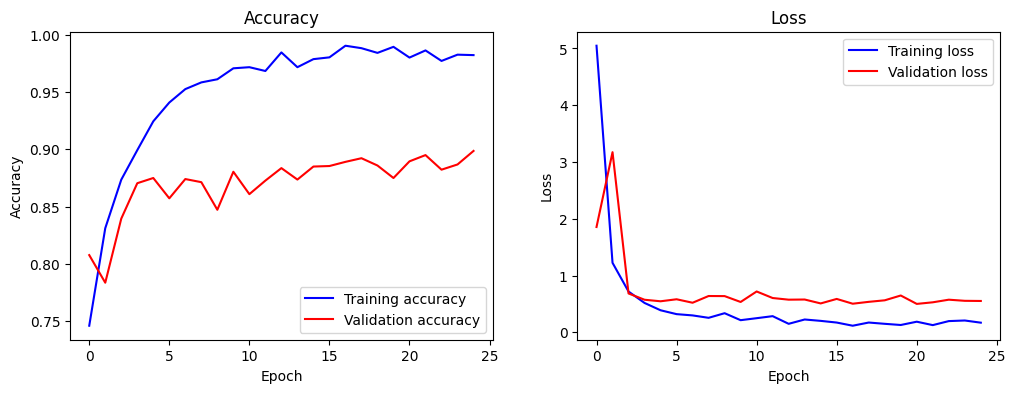

In [26]:
# Ekstraksi akurasi pelatihan, akurasi validasi, loss pelatihan, dan loss validasi
train_accuracy = history_resnet50.history['accuracy']
val_accuracy = history_resnet50.history['val_accuracy']
train_loss = history_resnet50.history['loss']
val_loss = history_resnet50.history['val_loss']

# Mendefinisikan rentang epoch berdasarkan panjang akurasi pelatihan
epochs = range(len(train_accuracy))

plt.figure(figsize=(12, 4))

# Membuat plot untuk akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Membuat plot untuk loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan visualisasi
plt.show()

In [27]:
# Lakukan prediksi menggunakan model pada data uji
predictions = model_resnet50.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
predicted_classes = le.inverse_transform(predicted_labels)

# Tampilkan classification report
print(classification_report(test_labels, predicted_classes))

56/56 [==============================] - 77s 1s/step
                                                        precision    recall  f1-score   support

                               Acne and Rosacea Photos       0.88      0.90      0.89       312
                                         Eczema Photos       0.85      0.74      0.79       309
                   Melanoma Skin Cancer Nevi and Moles       0.97      0.95      0.96       463
                                                Normal       1.00      0.93      0.97       199
Tinea Ringworm Candidiasis and other Fungal Infections       0.73      0.82      0.77       325
                                              vitiligo       0.92      1.00      0.96       153

                                              accuracy                           0.88      1761
                                             macro avg       0.89      0.89      0.89      1761
                                          weighted avg       0.89      0.88      

56/56 [==============================] - 76s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

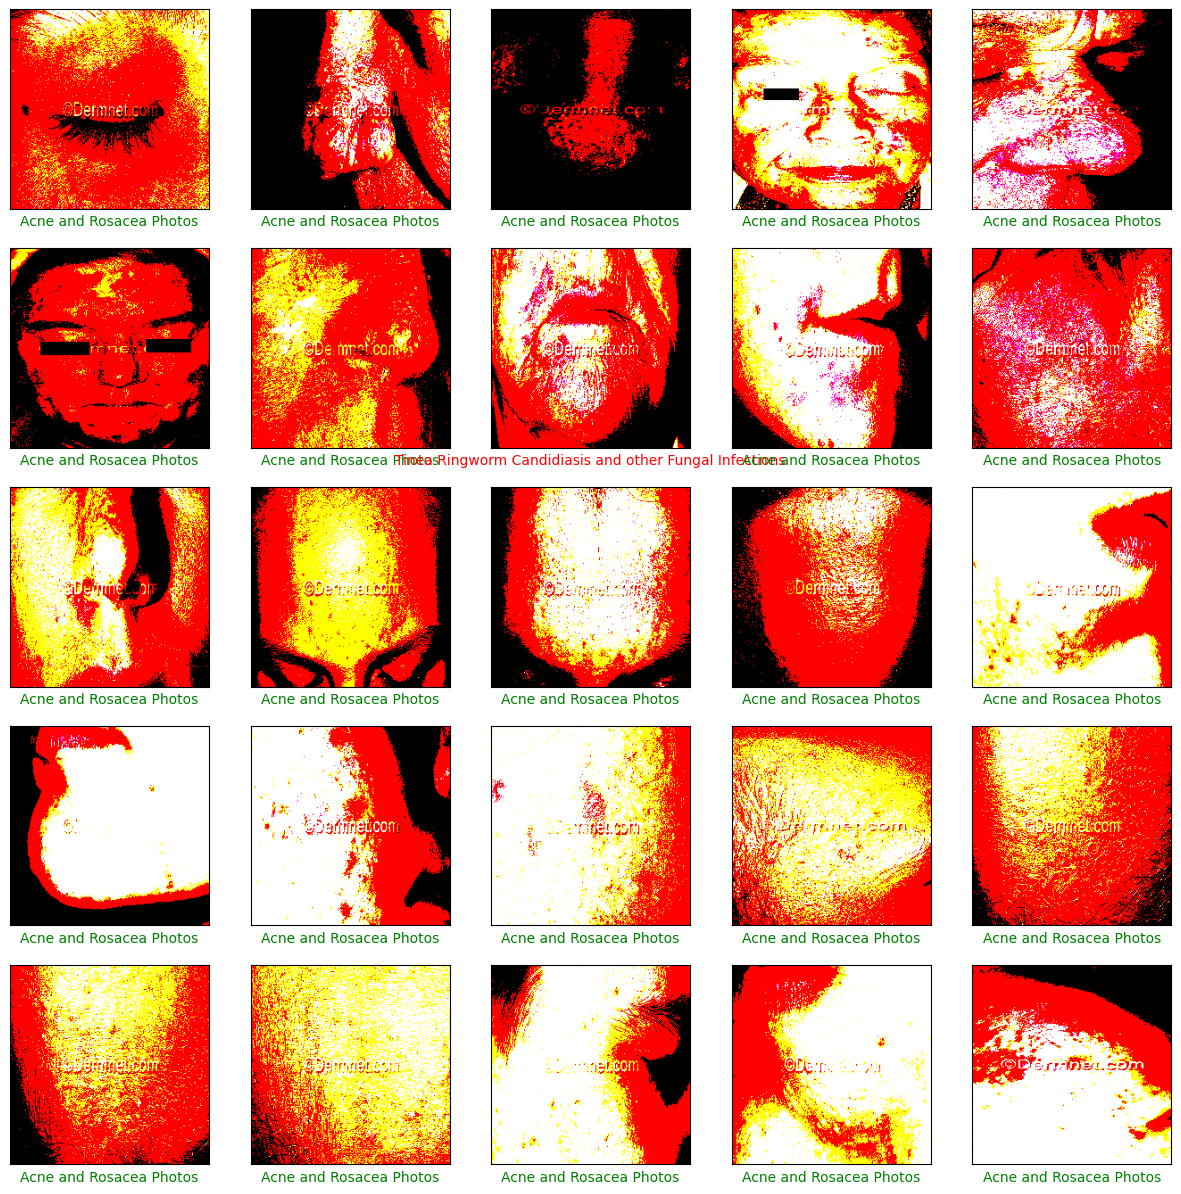

In [28]:
# Menampilkan gambar hasil prediksi
predictions_resnet50 = model_resnet50.predict(test_images)

plt.figure(figsize=(15, 15))
for i in range(25):  # Mengambil 25 gambar sebagai contoh
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Menampilkan gambar
    plt.imshow(test_images[i])
    
    # Melakukan prediksi pada gambar
    prediction = np.argmax(predictions_resnet50[i])
    true_label = np.argmax(test_labels_one_hot[i])
    
    # Menandai prediksi yang benar atau salah dengan warna
    if prediction == true_label:
        plt.xlabel(predicted_classes[i], color='green')  # Benar (hijau)
    else:
        plt.xlabel(predicted_classes[i], color='red')  # Salah (merah)
plt.show()

In [29]:
# Muat model VGG19 tanpa lapisan klasifikasi
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [30]:
# Tampilkan ringkasan model
base_model_vgg19.summary()

# Bekukan lapisan model dasar ResNet50
base_model_vgg19.trainable = True

# Cari indeks lapisan yang ingin kita latih ulang
fine_tune_at = 150

# Bekukan semua lapisan sebelum lapisan yang ingin dilatih ulang
for layer in base_model_vgg19.layers[:fine_tune_at]:
    layer.trainable = False

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
# Menambahkan lapisan global average pooling di atas model dasar
x_vgg19 = GlobalAveragePooling2D()(base_model_vgg19.output)

# Menambahkan lapisan dense dengan 512 neuron dan fungsi aktivasi ReLU
x_vgg19 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x_vgg19)

# Menambahkan lapisan dropout dengan dropout rate 0.5
x_vgg19 = Dropout(0.5)(x_vgg19)

# Menambahkan lapisan dense dengan 256 neuron dan fungsi aktivasi ReLU
x_vgg19 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x_vgg19)

# Fungsi aktivasi softmax
predictions_vgg19 = Dense(num_classes, activation='softmax')(x_vgg19)

# Menggabungkan model dasar ResNet50 dengan kepala yang baru
model_vgg19 = Model(inputs=base_model_vgg19.input, outputs=predictions_vgg19)

# Compile model ResNet50
model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Latih model VGG19 dengan data training dan validation
custom_early_stopping_vgg19 = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='min'
)

In [33]:
history_vgg19 = model_vgg19.fit(train_images, train_labels_one_hot, validation_data=(val_images, val_labels_one_hot),
                                epochs=25, batch_size=32, callbacks=[custom_early_stopping_vgg19])

Epoch 1/25
161/161 [==============================] - 955s 6s/step - loss: 7.1495 - accuracy: 0.6639 - val_loss: 4.8206 - val_accuracy: 0.7709
Epoch 2/25
161/161 [==============================] - 924s 6s/step - loss: 3.7918 - accuracy: 0.7594 - val_loss: 2.8843 - val_accuracy: 0.7891
Epoch 3/25
161/161 [==============================] - 928s 6s/step - loss: 2.3604 - accuracy: 0.7881 - val_loss: 2.0353 - val_accuracy: 0.7350
Epoch 4/25
161/161 [==============================] - 921s 6s/step - loss: 1.6783 - accuracy: 0.7990 - val_loss: 1.4453 - val_accuracy: 0.8027
Epoch 5/25
161/161 [==============================] - 924s 6s/step - loss: 1.3018 - accuracy: 0.8002 - val_loss: 1.2057 - val_accuracy: 0.7882
Epoch 6/25
161/161 [==============================] - 868s 5s/step - loss: 1.0971 - accuracy: 0.8084 - val_loss: 1.0509 - val_accuracy: 0.7918
Epoch 7/25
161/161 [==============================] - 848s 5s/step - loss: 0.9864 - accuracy: 0.8074 - val_loss: 0.9563 - val_accuracy: 0.7955

In [34]:
# Simpan Model VGG19
model_vgg19.save("D:\\kuliah\\Python\\dataset\\archive\\vgg19.h5")

In [35]:
# Evaluasi model VGG19 dengan data test
test_loss_vgg19, test_acc_vgg19 = model_vgg19.evaluate(test_images, test_labels_one_hot)
print(f'Test Loss VGG19: {test_loss_vgg19}')
print(f'Test Accuracy VGG19: {test_acc_vgg19}')

56/56 [==============================] - 187s 3s/step - loss: 0.9385 - accuracy: 0.7200
Test Loss VGG19: 0.9385003447532654
Test Accuracy VGG19: 0.7200454473495483


56/56 [==============================] - 191s 3s/step


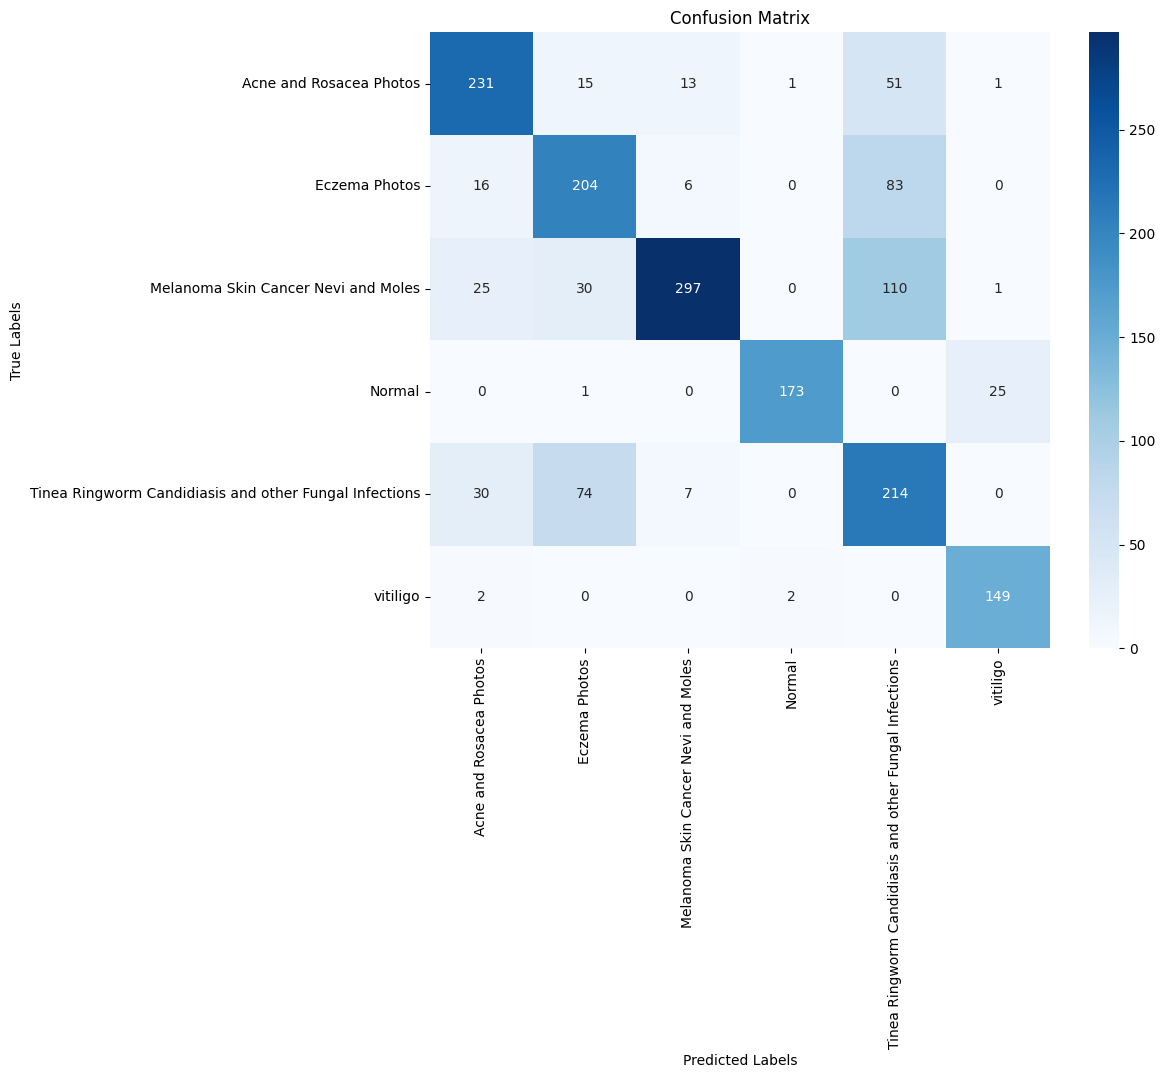

In [36]:
# Lakukan prediksi pada data uji
test_predictions = model_vgg19.predict(test_images)

# Konversi prediksi dari one-hot encoding ke label kelas
test_pred_labels = np.argmax(test_predictions, axis=1)

# Konversi label sebenarnya dari one-hot encoding ke label kelas
test_true_labels = np.argmax(test_labels_one_hot, axis=1)

# Hitung convusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels)

# Tampilkan matriks kebingungan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

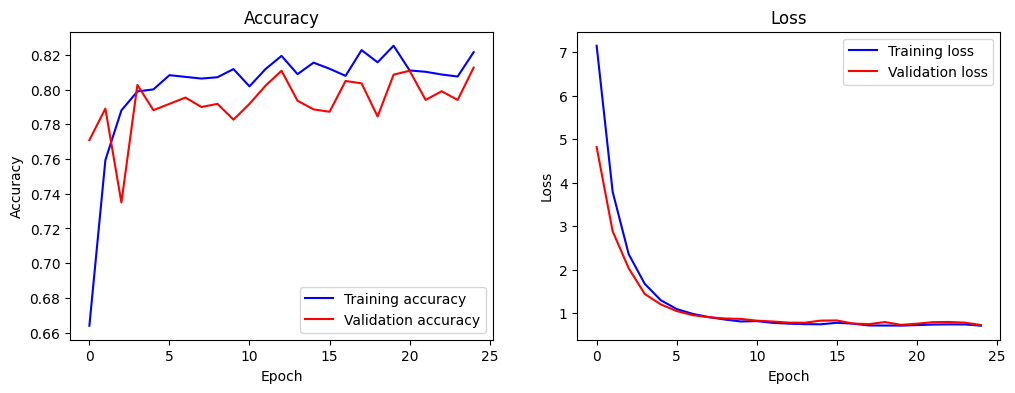

In [37]:
# Ekstraksi akurasi pelatihan, akurasi validasi, loss pelatihan, dan loss validasi
train_accuracy = history_vgg19.history['accuracy']
val_accuracy = history_vgg19.history['val_accuracy']
train_loss = history_vgg19.history['loss']
val_loss = history_vgg19.history['val_loss']

# Mendefinisikan rentang epoch berdasarkan panjang akurasi pelatihan
epochs = range(len(train_accuracy))

plt.figure(figsize=(12, 4))

# Plotting the accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan visualisasi
plt.show()

In [38]:
# Lakukan prediksi menggunakan model pada data uji
predictions = model_vgg19.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
predicted_classes = le.inverse_transform(predicted_labels)

# Tampilkan classification report
print(classification_report(test_labels, predicted_classes))

56/56 [==============================] - 186s 3s/step
                                                        precision    recall  f1-score   support

                               Acne and Rosacea Photos       0.76      0.74      0.75       312
                                         Eczema Photos       0.63      0.66      0.64       309
                   Melanoma Skin Cancer Nevi and Moles       0.92      0.64      0.76       463
                                                Normal       0.98      0.87      0.92       199
Tinea Ringworm Candidiasis and other Fungal Infections       0.47      0.66      0.55       325
                                              vitiligo       0.85      0.97      0.91       153

                                              accuracy                           0.72      1761
                                             macro avg       0.77      0.76      0.75      1761
                                          weighted avg       0.76      0.72     

56/56 [==============================] - 187s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

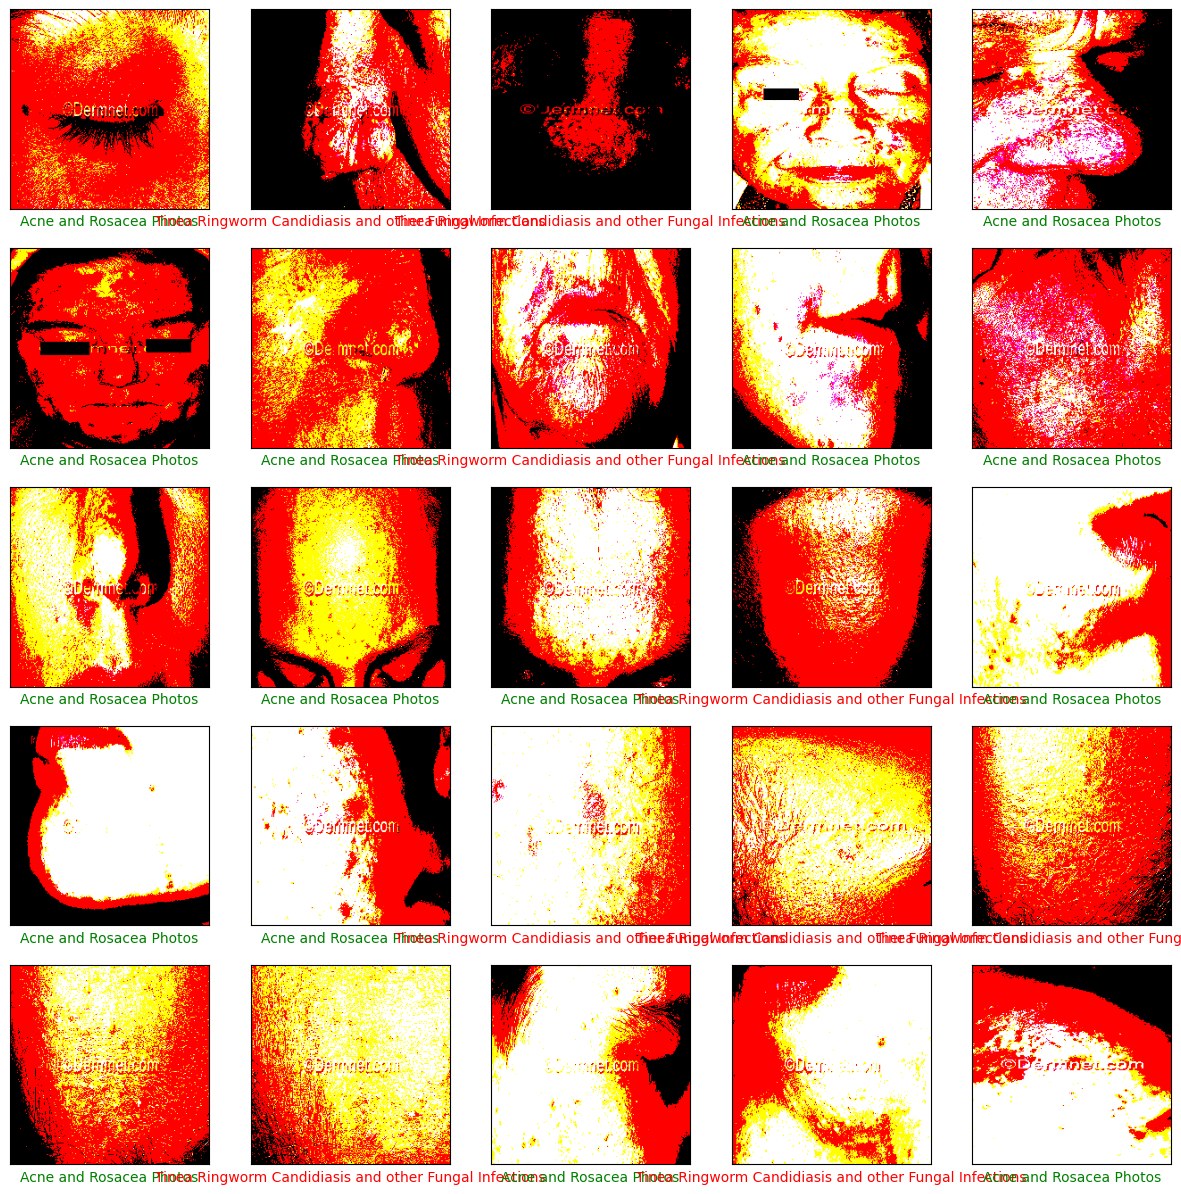

In [39]:
# Menampilkan gambar hasil prediksi
predictions_vgg19 = model_vgg19.predict(test_images)

plt.figure(figsize=(15, 15))
for i in range(25):  # Mengambil 25 gambar sebagai contoh
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Menampilkan gambar
    plt.imshow(test_images[i])
    
    # Melakukan prediksi pada gambar
    prediction = np.argmax(predictions_vgg19[i])
    true_label = np.argmax(test_labels_one_hot[i])
    
    # Menandai prediksi yang benar atau salah dengan warna
    if prediction == true_label:
        plt.xlabel(predicted_classes[i], color='green')  # Benar (hijau)
    else:
        plt.xlabel(predicted_classes[i], color='red')  # Salah (merah)
plt.show()